In [1]:
%matplotlib inline
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import hera_cc_utils as hera_cc
from matplotlib.colors import LogNorm

In [29]:
so_footprint = hera_cc.field_to_healpix(-57, 21)

<Figure size 432x288 with 0 Axes>

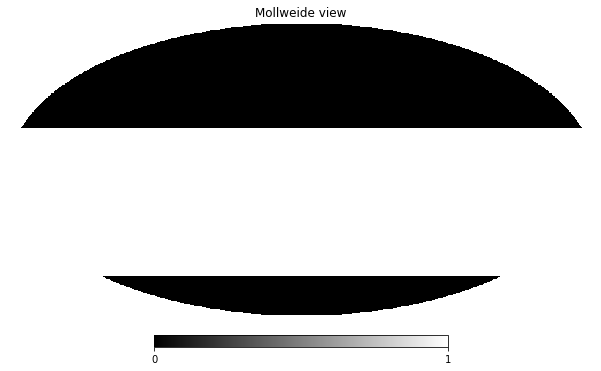

In [30]:
so = hera_cc.Map(data=so_footprint, coords_in="C")
fig1, ax1, proj1, img1 = so.plot_map(projection="equatorial", num=3, cmap="binary_r")

In [31]:
so_footprint.sum() / so_footprint.size

0.5985590616861979

In [33]:
raw_map = hp.fitsfunc.read_map("/Users/plaplant/Downloads/high_cadence_variable_scan_oscillating_el_telescope_all_time_all_hmap.fits")

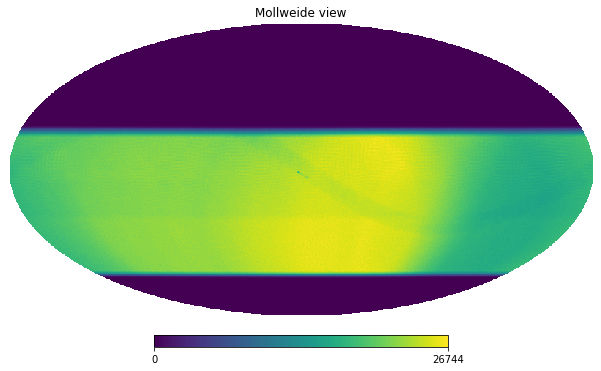

In [34]:
hp.mollview(raw_map)

In [39]:
gsm = hera_cc.Map(data="gsm")

In [40]:
gsm_map = gsm.get_map(projection="equatorial")

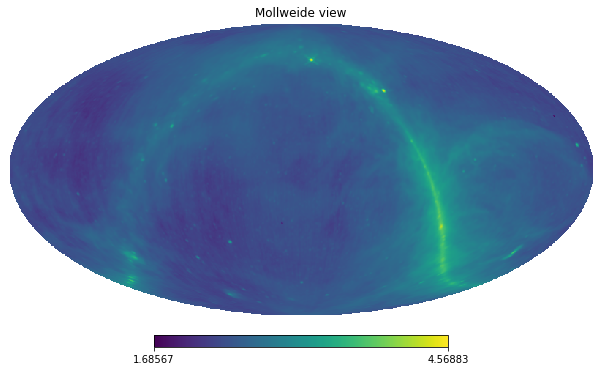

In [43]:
hp.mollview(np.log10(gsm_map))

In [59]:
gsm_mask = np.where(gsm_map > 400, 1, 0)

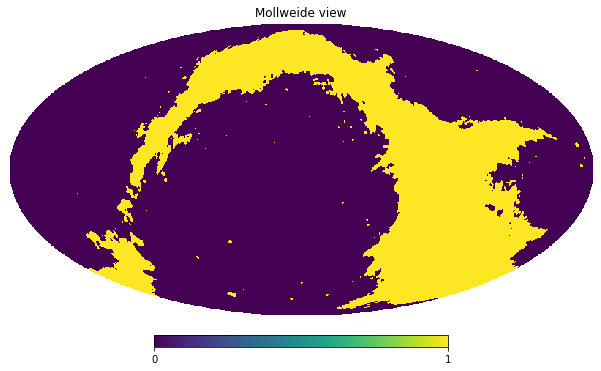

In [61]:
hp.mollview(gsm_mask)

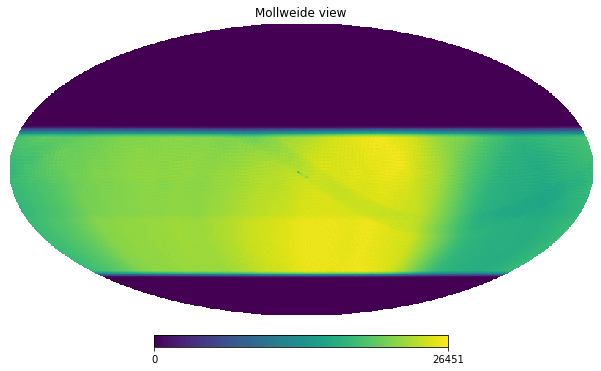

In [63]:
resamp = hp.ud_grade(raw_map, 512)
hp.mollview(resamp)

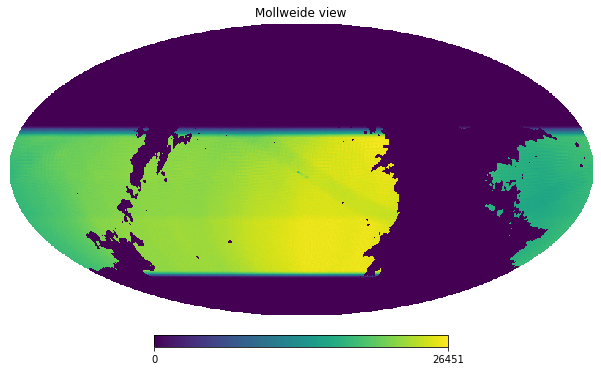

In [65]:
so_map = ~(gsm_mask.astype(np.bool_)) * resamp
hp.mollview(so_map)

In [66]:
np.count_nonzero(so_map) / so_map.size

0.4350077311197917

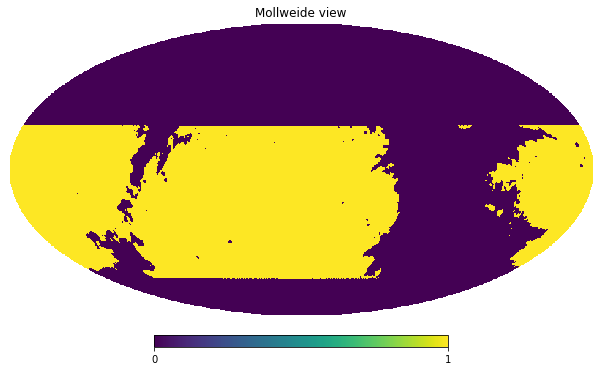

In [67]:
so_mask = np.where(so_map > 0, 1, 0)
hp.mollview(so_mask)

In [68]:
so_mask

array([0, 0, 0, ..., 0, 0, 0])

In [69]:
hp.fitsfunc.write_map?

In [70]:
hp.fitsfunc.write_map("so_map.fits", so_mask, coord="C", dtype=np.int32)

In [71]:
ls

example_survey_overlap.ipynb  so_test.ipynb
so_map.fits


In [72]:
pwd

'/Users/plaplant/Documents/school/penn/software/hera_cc_utils/examples'